# Deep Learning Problem Set

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys
import shutil
import re
import string
import pandas as pd
import tqdm
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

# import warnings
import tensorflow as tf
print(f"Version of tf = {tf.version.VERSION}")
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Model, Sequential, layers
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from tensorflow.keras.layers import Dot, Embedding, Flatten
from nltk.tokenize.toktok import ToktokTokenizer

# test GPU setting
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Available GPUs = ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Version of tf = 2.3.0
Available GPUs =  1


## Part I Math Problems

- Parts for 1.1 and 1.2.1, 1.2.2 was converted as PDF for submission as request.

### 1.2.3 Optimizers

- Object function: f(x) = x$^2$ + 6$y^2$ + xy
- Write Python code to solve the optimization problem with stochastic gradient descent, classical momentum, and Nesterov’s Accelerated Gradient. Do not use optimization packages, basic math operations with numpy are allowed. Which method is performing better and why?

In [ ]:
# define functions that implement:
# 1. SGD -> classical GD
# 2. Classical momentum 
# 3. Nesterov’s accelerated gradient

def calc_loss_gradient(vec_w):
    """ Computing the loss gradient numerically"""
    gd_x = 2*vec_w[0] + vec_w[1]
    gd_y = vec_w[0] + 12*vec_w[1]
    gd_w = np.array([gd_x, gd_y])
    return gd_w

def GD(vec_w, epsilon=0.05):
    """ Classical gradient descent algorithm"""
    vec_w_new = vec_w - epsilon*calc_loss_gradient(vec_w)
    return vec_w_new

def CM(vec_w, vec_vt, epsilon=0.05, mu=0.9):
    """ Classical momentum algorithm"""
    vec_vt_new = vec_vt*mu - epsilon*calc_loss_gradient(vec_w)
    vec_w_new = vec_w + vec_vt_new
    return vec_w_new, vec_vt_new

def NAG(vec_w, vec_vt, epsilon=0.05, mu=0.9):
    """ Nesterov’s accelerated gradient"""
    vec_vt_new = vec_vt*mu - epsilon*calc_loss_gradient(vec_w+np.array(vec_vt*mu))
    vec_w_new = vec_w + vec_vt_new
    return vec_w_new, vec_vt_new

# helper plot tool
def plot_opt(loss_history, steps, algo='GD'):
    """ Plot the optimization loss vs. step"""
    plt.figure(figsize=(12, 8))
    plt.plot(steps, loss_history)
    plt.xlabel('Opt steps', fontsize=14)
    plt.ylabel('Loss function change', fontsize=14)
    plt.title(f"Loss vs. opt steps for {algo}, steps = {len(steps)}", fontsize=16)
    plt.show()

In [ ]:
# run experimants

vec_w_0 = np.array([30, -30])
max_iter = 1000
tol = 1e-3  # tolerance

# 1. Gradient Descent 
vec_w = vec_w_0
steps_record_GD = []
loss_record_GD = []

for i in range(max_iter):
    vec_w_new = GD(vec_w=vec_w)
    delta = np.linalg.norm(vec_w_new - vec_w)
    # print(f"Step = {i}, loss = {delta}")
    
    # update and record
    vec_w = vec_w_new
    steps_record_GD.append(i)
    loss_record_GD.append(delta)
    
    if delta <= tol:
        break

In [ ]:
# 2. Classical momentum  

vec_w_0 = np.array([30, -30])
vec_vt_0 = np.zeros_like(vec_w_0)
max_iter = 1000
tol = 1e-3  # tolerance

vec_w = vec_w_0
vec_vt = vec_vt_0
steps_record_CM = []
loss_record_CM = []

for i in range(max_iter):
    vec_w_new, vec_vt_new = CM(vec_w=vec_w, vec_vt=vec_vt)
    delta = np.linalg.norm(vec_w_new - vec_w)
    # print(f"Step = {i}, loss = {delta}")
    
    # update and record
    vec_w = vec_w_new
    vec_vt = vec_vt_new
    steps_record_CM.append(i)
    loss_record_CM.append(delta)
    
    if delta <= tol:
        break

In [ ]:
# 3. Nesterov’s accelerated gradient

vec_w_0 = np.array([30, -30])
vec_vt_0 = np.zeros_like(vec_w_0)
max_iter = 1000
tol = 1e-3  # tolerance

vec_w = vec_w_0
vec_vt = vec_vt_0
steps_record_NAG = []
loss_record_NAG = []

for i in range(max_iter):
    vec_w_new, vec_vt_new = NAG(vec_w=vec_w, vec_vt=vec_vt)
    delta = np.linalg.norm(vec_w_new - vec_w)
    # print(f"Step = {i}, loss = {delta}")
    
    # update and record
    vec_w = vec_w_new
    vec_vt = vec_vt_new
    steps_record_NAG.append(i)
    loss_record_NAG.append(delta)
    
    if delta <= tol:
        break

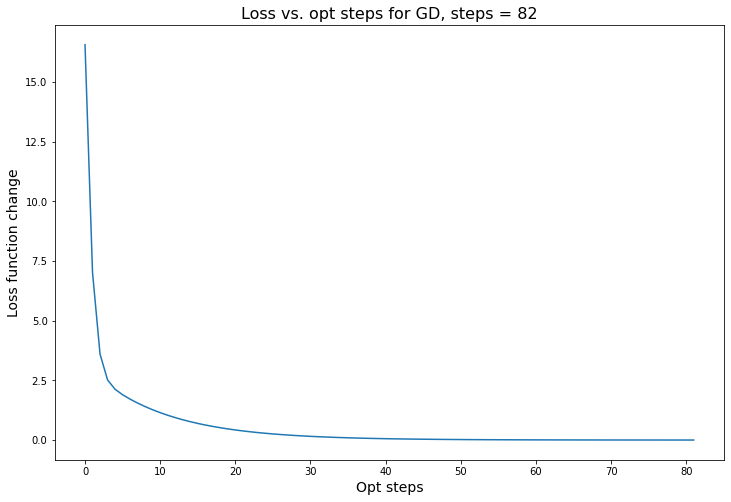

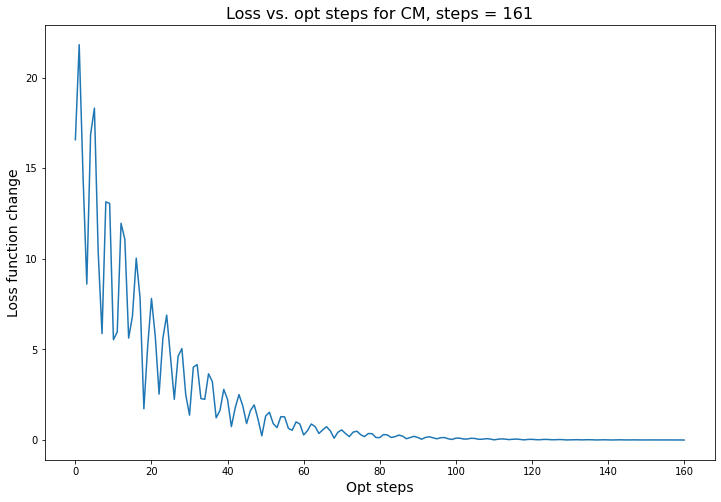

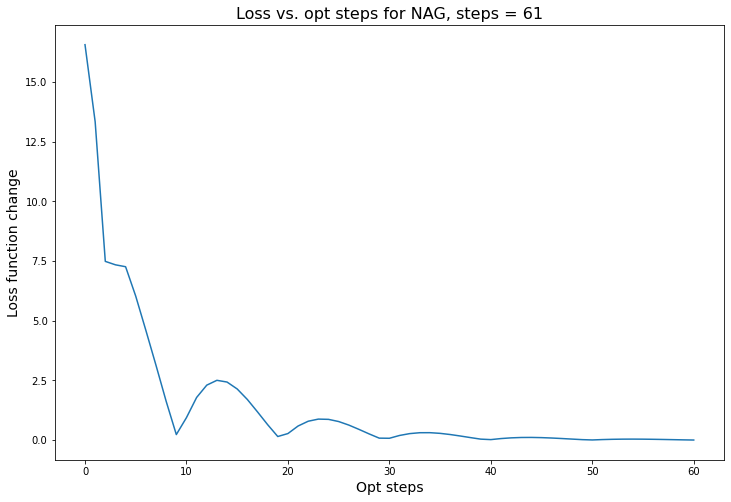

In [ ]:
plot_opt(loss_history=loss_record_GD, steps=steps_record_GD)
plot_opt(loss_history=loss_record_CM, steps=steps_record_CM, algo='CM')
plot_opt(loss_history=loss_record_NAG, steps=steps_record_NAG, algo='NAG')

In [ ]:
# report the last loss of the three algorithms

print(f"The optimized loss for GD = {loss_record_GD[-1]}")
print(f"The optimized loss for CM = {loss_record_CM[-1]}")
print(f"The optimized loss for NAG = {loss_record_NAG[-1]}")

The optimized loss for GD = 0.0009562795175552234
The optimized loss for CM = 0.00041948632831255114
The optimized loss for NAG = 0.00011302953915091978


**Summary for 1.2.3 optimization algorithms**:

- Based on the initial settings, implementation and performance of the three algorithms:
    - Gradient Descent (GD)
    - Classical Momentum (CM)
    - GD with Nesterov’s Accelerated Gradient (NAG)

  was summarized as above figures. From the figures:
    - GD took 82 steps to achieve optimized loss = $9.563 \times 10^{-4}$
    - CM took 161 steps (most of all three algorithms) to achieve optimized loss = $4.195 \times 10^{-4}$
    - NAG took only 61 steps (least of all three algorithms) to achieve optimized loss = $1.130 \times 10^{-4}$


- - --  - -  - - - -  - - - -

## Part II Applied Problems -- 2.1 Text
- References:
  - https://www.tensorflow.org/tutorials/text/word_embeddings
  - https://www.tensorflow.org/tutorials/text/word2vec#prepare_training_data_for_word2vec
  - https://www.tensorflow.org/tutorials/text/text_classification_rnn

### 2.1.0 Text Dataset Loading 

In [ ]:
# load the ”Large Movie Review Dataset" from tf.Keras file utility

url = "https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"

dataset = tf.keras.utils.get_file("aclImdb_v1.tar.gz", url,
                                    untar=True, cache_dir='.',
                                    cache_subdir='')

dataset_dir = os.path.join(os.path.dirname(dataset), 'aclImdb')
os.listdir(dataset_dir)

84131840/84125825 [==============================] - 9s 0us/step


['train', 'imdbEr.txt', 'test', 'imdb.vocab', 'README']

In [ ]:
# remove additional folders 

train_dir = os.path.join(dataset_dir, 'train')
print(f"Original training dir: {os.listdir(train_dir)}")

remove_dir = os.path.join(train_dir, 'unsup')
shutil.rmtree(remove_dir)

train_dir = os.path.join(dataset_dir, 'train')
print(f"Cleaned training dir: {os.listdir(train_dir)}")

Original training dir: ['labeledBow.feat', 'urls_unsup.txt', 'unsupBow.feat', 'neg', 'urls_neg.txt', 'pos', 'urls_pos.txt', 'unsup']
Cleaned training dir: ['labeledBow.feat', 'urls_unsup.txt', 'unsupBow.feat', 'neg', 'urls_neg.txt', 'pos', 'urls_pos.txt']


In [ ]:
# create tf.data.Dataset using tf.keras.preprocessing.text_dataset_from_directory
# Use the train directory to create both train and validation datasets with a split of 20% for validation.

batch_size_train = 20000
batch_size_val = 5000
seed = 123

train_ds = tf.keras.preprocessing.text_dataset_from_directory(
    'aclImdb/train', batch_size=batch_size_train, validation_split=0.2, 
    subset='training', seed=seed)

val_ds = tf.keras.preprocessing.text_dataset_from_directory(
    'aclImdb/train', batch_size=batch_size_val, validation_split=0.2, 
    subset='validation', seed=seed)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.
Found 25000 files belonging to 2 classes.
Using 5000 files for validation.


In [ ]:
# visualize a few texts from training dataset

for text_batch, label_batch in train_ds.take(1):
    for i in range(5):
        print(label_batch[i].numpy(), text_batch.numpy()[i])

1 b"Canadian director Vincenzo Natali took the art-house circuit by storm with the intriguing and astonishingly intelligent Cube, which is my personal favourite SF film of the 90s. It framed the basic conceit of a group of strangers trapped in a maze shaped like a giant cube, shot entirely on one set, and took this idea in fascinating directions. <br /><br />I've been eagerly awaiting Natali's follow-up, and although its taken five years for him to mount another project, I'm delighted to say it was worth the wait. Cypher is a fascinating exploration of one man's place in the world, and how through a completely logical chain of events, finds himself in a situation beyond his control.<br /><br />I don't want to reveal too much about the plot, because one of the joys of Cypher is the different avenues it takes us down. It is so refreshing in this day and age to see a SF film that has more than one idea in it's head. Cypher is such a film.<br /><br />Morgan Sullivan (Jeremy Northam), one o

In [ ]:
type(train_ds)

tensorflow.python.data.ops.dataset_ops.BatchDataset

In [ ]:
for text_batch, label_batch in train_ds.take(2):
    print(text_batch.shape)

for text_batch, label_batch in val_ds.take(2):
    print(text_batch.shape)

(20000,)
(5000,)


### 2.1.1 Visualization

- Plot a sample of 1000 data points from the training set (500 positive and 500
negative) using t-SNE, and color the points by sentiment label. Comment on any observed trends.

In [ ]:
# convert the a batch of BatchDataset to iterable object

sub_train_ds = train_ds.take(1)
sub_train_ds_list = list(sub_train_ds.as_numpy_iterator())

In [ ]:
# two empty dicts with positive labels and negative labels respectively, 
# from training dataset
pos_sample_train_dict = {}
neg_sample_train_dict = {}

for idx, (text, label) in enumerate(zip(sub_train_ds_list[0][0], sub_train_ds_list[0][1])):
    if len(neg_sample_train_dict.keys()) < 500:
        if label == 0:
            neg_sample_train_dict[idx] = text

    if len(pos_sample_train_dict.keys()) < 500:
        if label == 1:
            pos_sample_train_dict[idx] = text

print(f"Finish loading positive texts = {len(pos_sample_train_dict.keys())}, \
negative texts = {len(neg_sample_train_dict.keys())}.")

Finish loading positive texts = 500, negative texts = 500.


In [ ]:
# convert dict to df
# concat the dfs, with label as feature
# show the df of sample pos/neg texts data

pos_sample_train_df = pd.DataFrame.from_dict(pos_sample_train_dict, orient='index')
neg_sample_train_df = pd.DataFrame.from_dict(neg_sample_train_dict, orient='index')

pos_sample_train_df.columns = ['text']
neg_sample_train_df.columns = ['text']

pos_sample_train_df['label'] = [1 for i in range(500)]
neg_sample_train_df['label'] = [0 for i in range(500)]

text_sample_train_df = pd.concat([pos_sample_train_df, neg_sample_train_df])

# shuffle
text_sample_train_df = text_sample_train_df.sample(frac=1) 
text_sample_train_df.head(5)

,text,label
794,b'Some have compared this film to Deliverance....,1
6,b'Sistas in da hood. Looking for revenge and b...,0
397,"b""Tyrannosaurus Azteca is set during the sixte...",0
357,"b'""Match Point"" and now ""Scoop"" have both conv...",1
33,"b""I was very fond of this film. It kept me gue...",1


In [ ]:
# Use TF-IDF to obtain a numerical representation for the data
# only consider the 5000 most frequently-occuring words in the dataset

tfidf_config = TfidfVectorizer(min_df=0, max_df=1, use_idf=True, max_features=5000, ngram_range=(1,1))
sample_feature_matrix = tfidf_config.fit_transform(text_sample_train_df['text'])
print(f"Training tf-idf feature matrix dimension = {sample_feature_matrix.shape}")

Training tf-idf feature matrix dimension = (1000, 5000)


In [ ]:
# Perform t-SNE to reduce the dimensionality down to 2 dimenions

tsne = TSNE(n_components=2)
tsne_fit = tsne.fit_transform(sample_feature_matrix)
print(f"Reduced feature dimension = {tsne_fit.shape}")

Reduced feature dimension = (1000, 2)


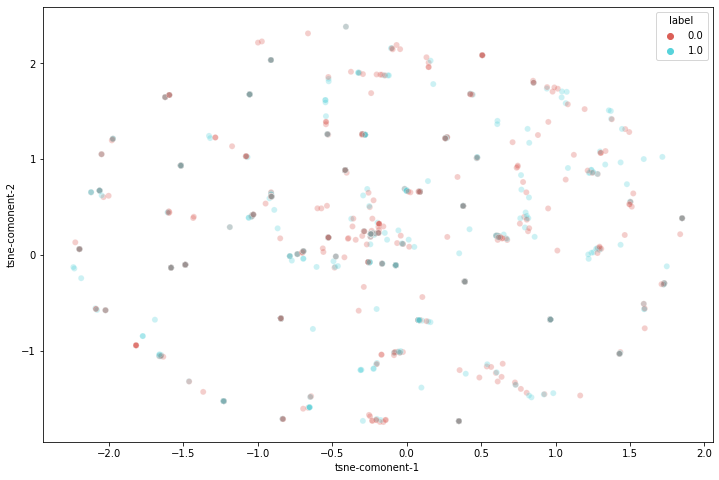

In [ ]:
# visualize the T-SNE plot 

tsne_df = pd.DataFrame()
tsne_df['tsne-comonent-1'] = tsne_fit[:,0]
tsne_df['tsne-comonent-2'] = tsne_fit[:,1]

plt.figure(figsize=(12, 8))
sns.scatterplot(
    x="tsne-comonent-1", y="tsne-comonent-2",
    hue=text_sample_train_df['label'],
    palette=sns.color_palette("hls", 2),
    data=tsne_df,
    legend="full",
    alpha=0.3
)

**Comment on any observed trends 2.1.1：**

- From the above t-SNE analysis, we cannot really tell the cluster of sentiment labels by words in texts. The first two t-SNE components cannot reflect the True label of the sentence.

### 2.1.2 Baseline models

- Use TF-IDF to obtain a numerical representation for the data. Using
10-fold cross-validation, report average validation accuracy and F1 scores for a Logistic Regression classifier
using the TF-IDF vectors as input.

In [ ]:
# convert the full batches of BatchDataset of train and valid ds to iterable objects
# perform the data conversion on train ds
full_train_ds_list = list(train_ds.as_numpy_iterator())
full_pos_train_ds_dict = {}
full_neg_train_ds_dict = {}

for idx, (text, label) in enumerate(zip(full_train_ds_list[0][0], full_train_ds_list[0][1])):
    if label == 0:
        full_neg_train_ds_dict[idx] = text

    if label == 1:
        full_pos_train_ds_dict[idx] = text

print(f"Finish loading positive texts for training dataset = {len(full_pos_train_ds_dict.keys())}, \
negative texts = {len(full_neg_train_ds_dict.keys())}.")

Finish loading positive texts for training dataset = 9943, negative texts = 10057.


In [ ]:
# perform the data conversion on valid ds

full_valid_ds_list = list(val_ds.as_numpy_iterator())
full_pos_valid_ds_dict = {}
full_neg_valid_ds_dict = {}

for idx, (text, label) in enumerate(zip(full_valid_ds_list[0][0], full_valid_ds_list[0][1])):
    if label == 0:
        full_neg_valid_ds_dict[idx] = text

    if label == 1:
        full_pos_valid_ds_dict[idx] = text

print(f"Finish loading positive for valid dataset texts = {len(full_pos_valid_ds_dict.keys())}, \
negative texts = {len(full_neg_valid_ds_dict.keys())}.")

Finish loading positive for valid dataset texts = 2557, negative texts = 2443.


In [ ]:
# convert all full train/valid dicts to dfs
# concat the dfs, with label as feature
# show the dfs of sample pos/neg texts data
num_train_ds = len(full_train_ds_list[0][1])  # 20000
num_valid_ds = len(full_valid_ds_list[0][1])  # 5000

# for train set
full_pos_train_ds_df = pd.DataFrame.from_dict(full_pos_train_ds_dict, orient='index')
full_neg_train_ds_df = pd.DataFrame.from_dict(full_neg_train_ds_dict, orient='index')
# for valid set
full_pos_valid_ds_df = pd.DataFrame.from_dict(full_pos_valid_ds_dict, orient='index')
full_neg_valid_ds_df = pd.DataFrame.from_dict(full_neg_valid_ds_dict, orient='index')

# edit column name 
full_pos_train_ds_df.columns = ['text']
full_neg_train_ds_df.columns = ['text']
full_pos_valid_ds_df.columns = ['text']
full_neg_valid_ds_df.columns = ['text']

# add label feature
full_pos_train_ds_df['label'] = [1 for i in range(9943)]
full_neg_train_ds_df['label'] = [0 for i in range(10057)]
full_pos_valid_ds_df['label'] = [1 for i in range(2557)]
full_neg_valid_ds_df['label'] = [0 for i in range(2443)]

# concat pos/neg dfs
full_train_df = pd.concat([full_pos_train_ds_df, full_neg_train_ds_df])
full_valid_df = pd.concat([full_pos_valid_ds_df, full_neg_valid_ds_df])

# shuffle train/valid dfs 
full_train_df = full_train_df.sample(frac=1) 
full_valid_df = full_valid_df.sample(frac=1)

# show top 5 data
print(full_train_df.head(5))
print(full_valid_df.head(5))

                                                    text  label
10976  b"I'm sorry, I had high hopes for this movie. ...      0
10824  b"Cinderella takes me back, when I was a littl...      1
13491  b'My choice for greatest movie ever used to be...      1
9700   b'Again, it seems totally illogical, to me at ...      1
4075   b'This film has a clear storyline, which is qu...      1
                                                   text  label
4069  b'Although the beginning of the movie in New Y...      1
4060  b'Last of the Johnny Weissmuller Tarzan films ...      0
4133  b'I kind of liked The Lonely Lady. Give Pia a ...      1
1520  b'I work with children from 0 \xc2\x96 6 years...      1
3804  b'Fred Astaire and Ginger Rogers, Hollywood\'s...      1


In [ ]:
# Use TF-IDF to obtain a numerical representation for the data
# only consider the 5000 most frequently-occuring words in the dataset
# use the pre-configurated tf-dif setting in part 2.2.1

full_train_feature_matrix = tfidf_config.fit_transform(full_train_df['text'])
full_valid_feature_matrix = tfidf_config.fit_transform(full_valid_df['text'])
print(f"Train set tf-idf feature matrix dimension = {full_train_feature_matrix.shape}")
print(f"Valid set tf-idf feature matrix dimension = {full_valid_feature_matrix.shape}")

Train set tf-idf feature matrix dimension = (20000, 5000)
Valid set tf-idf feature matrix dimension = (5000, 5000)


In [ ]:
# train the baseline Logistic Regression classifier using the TF-IDF vectors as input

# Config binary labelinzer
lb = LabelBinarizer()

# apply binarizer on train/valid set labels
train_lb= lb.fit_transform(full_train_df['label']).flatten(order='C')
valid_lb = lb.fit_transform(full_valid_df['label']).flatten(order='C')

# config and fit baseline model LR with CV = 10
baseline_LR = LogisticRegression()
baseline_LR.fit(full_train_feature_matrix, train_lb)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# report average accuracy and F1 scores on validation set

accuracy = cross_val_score(baseline_LR, full_valid_feature_matrix, valid_lb, cv=10)
f1_score = cross_val_score(baseline_LR, full_valid_feature_matrix, valid_lb, cv=10, scoring='f1')
print(f"Average validation accuracy of the baseline Logit classifier = {np.mean(accuracy)}.")
print(f"Average validation F1 score of the baseline Logit classifier = {np.mean(f1_score)}.")

Average validation accuracy of the baseline Logit classifier = 0.5114.
Average validation F1 score of the baseline Logit classifier = 0.6767230806965907.


**Summary on 2.1.2**:


For the baseline Logistic Regression classifier using the TF-IDF vectors as input: 
- Average validation accuracy = 0.5114
- Average validation F1 scores = 0.6767

### 2.1.3 Embeddings

- Implement Word2Vec using Tensorflow, and train it on the text data to produce 32-dimensional word embeddings. 
- Plot the resulting word vectors using t-SNE. Plot the same 1000 observations as before (500 positive, 500 negative) using t-SNE, but represent each observation as the average of the embeddings for each word in the observation. 
- Perform the same cross-validation as above (Logistic Regression) and report performance (accuracy, F1), this time using the document-averaged embeddings as
input. 

In [ ]:
# add general configs

SEED = 42 
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [ ]:
# convert the train/valid datasets as text corpus
# This part of generated .txt files were attached with this notebook

train_cp_txt = open('train_corpus.txt', 'a')
valid_cp_txt = open('valid_corpus.txt', 'a')

for text_batch, label_batch in train_ds.take(1):
    for i in tqdm.tqdm(range(20000)):
        single_text = text_batch.numpy()[i]
        print(single_text.decode("utf-8"), '\n', file=train_cp_txt)

train_cp_txt.close()

for text_batch, label_batch in val_ds.take(1):
    for i in tqdm.tqdm(range(5000)):
        single_text = text_batch.numpy()[i]
        print(single_text.decode("utf-8"), '\n', file=valid_cp_txt)

valid_cp_txt.close()

100%|██████████| 5000/5000 [00:17<00:00, 285.63it/s]


In [ ]:
# show a few corpus examples
# the pre-generated file was attached 

with open('/content/train_corpus.txt') as f: 
    lines = f.read().splitlines()
for line in lines[:5]:
    print(line)

I think part of the reason this movie was made...and is aimed at us gamers who actually play all the Nancy Drew PC games. There's been a lot of movies lately based on video games, and I think this in one of them.<br /><br />So this movie does not follow any book. But it does follow parts of the games. I buy and play every Nancy Drew games as soon as it comes out. And the games are from HerInteractive and are for "girls who aren't afraid of a mouse!" And some of these games actually won Parents' Choice Gold Awards. They are not only fun but you can actually learn a thing or two while playing.<br /><br />I took two of my step children with me to go see it and they loved it! The 10 yr. old had started playing her first Nancy Drew game a day before I took her to see the movie, and she was having so much fun playing the game I thought she would enjoy the movie as well. And I was right...she not only loved this movie but couldn't wait to get home to finish her first game and start another on

In [ ]:
# Use the non empty lines to construct a tf.data.TextLineDataset object for next steps

path_train_corpus = '/content/train_corpus.txt'
path_valid_corpus = '/content/valid_corpus.txt'
text_train_ds = tf.data.TextLineDataset(path_train_corpus).filter(lambda x: tf.cast(tf.strings.length(x), bool))
text_valid_ds = tf.data.TextLineDataset(path_train_corpus).filter(lambda x: tf.cast(tf.strings.length(x), bool))

In [ ]:
# Vectorize sentences from the corpus

# Create a custom standardization function to strip HTML break tags '<br />'.
def custom_standardization(input_data):
    lowercase = tf.strings.lower(input_data)
    stripped_html = tf.strings.regex_replace(lowercase, '<br />', ' ')
    return tf.strings.regex_replace(stripped_html,
                                    '[%s]' % re.escape(string.punctuation), '')
    
# Define the vocabulary size and number of words in a sequence.
vocab_size = 5000
sequence_length = 250

# Use the text vectorization layer to normalize, split, and map strings to
# integers. Set output_sequence_length length to pad all samples to same length.
vectorize_layer = TextVectorization(
    standardize=custom_standardization,
    max_tokens=vocab_size,
    output_mode='int',
    output_sequence_length=sequence_length)

# create vocabulary
vectorize_layer.adapt(text_train_ds.batch(1024))

In [ ]:
# Save the created vocabulary for reference

inverse_vocab = vectorize_layer.get_vocabulary()
print(inverse_vocab[:20])

['', '[UNK]', 'the', 'and', 'a', 'of', 'to', 'is', 'in', 'it', 'i', 'this', 'that', 'was', 'as', 'with', 'for', 'movie', 'but', 'film']


In [ ]:
# use the vectorize_layer to generate vectors for each element in the text train ds

def vectorize_text(text):
    text = tf.expand_dims(text, -1)
    return tf.squeeze(vectorize_layer(text))

text_vector_ds = text_train_ds.batch(1024).prefetch(AUTOTUNE).map(vectorize_layer).unbatch()
sequences = list(text_vector_ds.as_numpy_iterator())
print(f"The length of sequences = {len(sequences)}")

# see a few examples 
for seq in sequences[:1]:
    print(f"{seq} => {[inverse_vocab[i] for i in seq]}")

The length of sequences = 20000
[  10  102  166    5    2  274   11   17   13    1    7 3671   30  170
    1   36  155  291   31    2 2634 2249    1 1480  215   74    4  168
    5   91 4038  439   20  393 1480    3   10  102   11    8   28    5
   93   37   11   17  120   21  811   98  284   18    9  120  811  510
    5    2 1480   10  817    3  291  171 2634 2249 1480   14  505   14
    9  253   44    3    2 1480   23   35    1    3   23   16  480   36
  678 1592    5    4 3083    3   46    5  128 1480  155 1161  770 1079
 1906 2091   34   23   21   60  242   18   22   68  155  799    4  149
   41  105  134  380   10  549  105    5   56 1545  469   15   69    6
  137   65    9    3   34  434    9    2  302    1  164   67  622  380
   39   84 2634 2249  502    4  257  154   10  549   39    6   65    2
   17    3   54   13  252   37   72  242  380    2  502   10  197   54
   58  351    2   17   14   73    3   10   13    1   21   60  434   11
   17   18  414  842    6   76  339    6 1343

In [ ]:
# Generates skip-gram pairs with negative sampling for a list of sequences
# (int-encoded sentences) based on window size, number of negative samples
# and vocabulary size.

def generate_training_data(sequences, window_size, num_ns, vocab_size, seed):
    # Elements of each training example are appended to these lists.
    targets, contexts, labels = [], [], []

    # Build the sampling table for vocab_size tokens.
    sampling_table = tf.keras.preprocessing.sequence.make_sampling_table(vocab_size)

    # Iterate over all sequences (sentences) in dataset.
    for sequence in tqdm.tqdm(sequences):

        # Generate positive skip-gram pairs for a sequence (sentence).
        positive_skip_grams, _ = tf.keras.preprocessing.sequence.skipgrams(
            sequence, 
            vocabulary_size=vocab_size,
            sampling_table=sampling_table,
            window_size=window_size,
            negative_samples=0)
        
        # Iterate over each positive skip-gram pair to produce training examples 
        # with positive context word and negative samples.
        for target_word, context_word in positive_skip_grams:
            context_class = tf.expand_dims(
                tf.constant([context_word], dtype="int64"), 1)
            negative_sampling_candidates, _, _ = tf.random.log_uniform_candidate_sampler(
                true_classes=context_class,
                num_true=1, 
                num_sampled=num_ns, 
                unique=True, 
                range_max=vocab_size, 
                seed=SEED, 
                name="negative_sampling")

            # Build context and label vectors (for one target word)
            negative_sampling_candidates = tf.expand_dims(
                negative_sampling_candidates, 1)

            context = tf.concat([context_class, negative_sampling_candidates], 0)
            label = tf.constant([1] + [0]*num_ns, dtype="int64")

            # Append each element from the training example to global lists.
            targets.append(target_word)
            contexts.append(context)
            labels.append(label)

    return targets, contexts, labels

In [ ]:
# Generate training examples from sequences

targets, contexts, labels = generate_training_data(
    sequences=sequences, 
    window_size=2, 
    num_ns=4, 
    vocab_size=vocab_size, 
    seed=SEED)

print(len(targets), len(contexts), len(labels))

100%|██████████| 20000/20000 [12:27<00:00, 26.76it/s]

1530447 1530447 1530447


In [ ]:
# Configure the dataset for performance

BATCH_SIZE = 1024
BUFFER_SIZE = 10000
w2v_dataset = tf.data.Dataset.from_tensor_slices(((targets, contexts), labels))
w2v_dataset = w2v_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)
print(w2v_dataset)

w2v_dataset = w2v_dataset.cache().prefetch(buffer_size=AUTOTUNE)
print(w2v_dataset)

<BatchDataset shapes: (((1024,), (1024, 5, 1)), (1024, 5)), types: ((tf.int32, tf.int64), tf.int64)>
<PrefetchDataset shapes: (((1024,), (1024, 5, 1)), (1024, 5)), types: ((tf.int32, tf.int64), tf.int64)>


In [ ]:
# define the Word2Vec class

class Word2Vec(Model):
    def __init__(self, vocab_size, embedding_dim, num_ns=4):
        super(Word2Vec, self).__init__()
        self.target_embedding = Embedding(vocab_size, 
                                        embedding_dim,
                                        input_length=1,
                                        name="w2v_embedding", )
        self.context_embedding = Embedding(vocab_size, 
                                        embedding_dim, 
                                        input_length=num_ns+1)
        self.dots = Dot(axes=(3,2))
        self.flatten = Flatten()

    def call(self, pair):
        target, context = pair
        we = self.target_embedding(target)
        ce = self.context_embedding(context)
        dots = self.dots([ce, we])
        return self.flatten(dots)

In [ ]:
# compile the word2vec model and training
# generate weight matrices for each of the 5000 vocabularies
# train on the text data to produce 32-dimensional word embeddings

embedding_dim = 32
word2vec = Word2Vec(vocab_size, embedding_dim)
word2vec.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# start training
tensorboard_callback_w2v = tf.keras.callbacks.TensorBoard(log_dir="logs")
word2vec.fit(w2v_dataset, epochs=10, callbacks=[tensorboard_callback_w2v])

Epoch 1/10
   1/1494 [..............................] - ETA: 0s - loss: 1.6094 - accuracy: 0.2148WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1494/1494 [==============================] - 11s 7ms/step - loss: 1.4858 - accuracy: 0.3563
Epoch 2/10
1494/1494 [==============================] - 11s 7ms/step - loss: 1.3880 - accuracy: 0.4142
Epoch 3/10
1494/1494 [==============================] - 12s 8ms/step - loss: 1.3394 - accuracy: 0.4438
Epoch 4/10
1494/1494 [==============================] - 11s 8ms/step - loss: 1.3060 - accuracy: 0.4620
Epoch 5/10
1494/1494 [==============================] - 11s 8ms/step - loss: 1.2812 - accuracy: 0.4743
Epoch 6/10
1494/1494 [==============================] - 12s 8ms/step - loss: 1.2614 - accuracy: 0.4840
Epoch 7/10
1494/14

In [ ]:
# get the weights of Embeddings

# define a helper function for saving the trained weight matrix
def gen_embeddings(sequences, weights, verbose=True):
    """implement average of the embeddings for each word in the observation"""
    # initialize a container matrix for weights 
    shape_weights = weights.shape[1]
    mat_embedding = np.zeros([len(sequences), shape_weights])
    for seq in range(len(sequences)):
        sequence = sequences[seq]
        # average the 5000 most frequently-occuring words
        weights_avg = np.mean(weights[sequence,:], axis=0)
        mat_embedding[seq, :] = weights_avg
    if verbose:
        print(f"The dimension of generated embeddings = {mat_embedding.shape}.")
    return mat_embedding

# get trained weights from word2vec trained model and generate embeddings
weights = word2vec.get_layer('w2v_embedding').get_weights()[0]
mat_embedding_train = gen_embeddings(sequences, weights)

The dimension of generated embeddings = (20000, 32).


In [ ]:
# in the later part, order to enhance the generalization of trained word2vec model,
# use the trained vocab set to reconstruct the validation set

# define a function to reconstruct validation sequence
def reconstruct_validation_seq(val_text, vocab_train, length_seq):
    """ use the trained vocab set from word2vec model to reconstruct 
    the validation set, return the tokenized encoded sentence from 
    validation set 
    """
    # tokenize the input text sentence
    tokenizer = ToktokTokenizer()
    tokens = tokenizer.tokenize(val_text)
    single_val_sequence = []
    for token in tokens:
        index = np.where(np.array(vocab_train) == token)[0]
        if len(index) != 0:
            single_val_sequence.append(index[0])
        # code 'UNK' denoted 1 after encoding 
        else:
            single_val_sequence.append(1)
    # length of sequence without encoded words 
    temp_length_seq = (length_seq - len(tokens))*[0]
    # refill to reconstructed original sequence length
    single_val_sequence = single_val_sequence + temp_length_seq

    return single_val_sequence

# provides the vocabulary to build a metadata file with one token per line
vocab = vectorize_layer.get_vocabulary()

# perform  reconstruction
val_sequences = []
for text_batch, label_batch in val_ds.take(1):
    for i in tqdm.tqdm(range(5000)):
        single_text = text_batch.numpy()[i]
        # decode the byte type 
        single_text = single_text.decode("utf-8")
        # call the function 
        single_val_sequence = reconstruct_validation_seq(
            val_text=single_text,
            vocab_train=vocab,
            length_seq=sequence_length
        )
        val_sequences.append(single_val_sequence)

100%|██████████| 5000/5000 [12:08<00:00,  6.87it/s]


In [ ]:
# similar as above code cell for getting training embeddings
# apply on validation set 

mat_embedding_valid = gen_embeddings(val_sequences, weights)

The dimension of generated embeddings = (5000, 32).


In [ ]:
# Plot the resulting word vectors using t-SNE. 
# Perform t-SNE to reduce the dimensionality down to 2 dimenions

tsne = TSNE(n_components=2)
tsne_fit_w2v = tsne.fit_transform(mat_embedding_train[:1000])
print(f"Reduced word2vec model weights dimension = {tsne_fit_w2v.shape}")

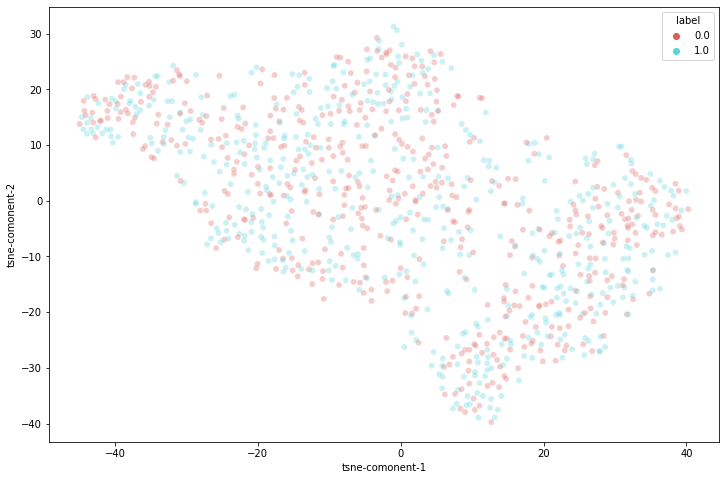

In [ ]:
# visualize the word2vec version of T-SNE plot 

tsne_df_w2v = pd.DataFrame()
tsne_df_w2v['tsne-comonent-1'] = tsne_fit_w2v[:,0]
tsne_df_w2v['tsne-comonent-2'] = tsne_fit_w2v[:,1]

plt.figure(figsize=(12, 8))
sns.scatterplot(
    x="tsne-comonent-1", y="tsne-comonent-2",
    hue=text_sample_train_df['label'],
    palette=sns.color_palette("hls", 2),
    data=tsne_df_w2v,
    legend="full",
    alpha=0.3
)

In [ ]:
# train the baseline Logistic Regression classifier using
# the document-averaged embeddings as input

# Config binary labelinzer
lb_w2v = LabelBinarizer()

# apply binarizer on train/valid set labels
train_lb= lb_w2v.fit_transform(full_train_df['label']).flatten(order='C')
valid_lb = lb_w2v.fit_transform(full_valid_df['label']).flatten(order='C')

# config and fit baseline model LR with CV = 10
baseline_LR_w2v = LogisticRegression()
baseline_LR_w2v.fit(mat_embedding_train, train_lb)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# report average accuracy and F1 scores on validation set

accuracy_w2v = cross_val_score(baseline_LR_w2v, mat_embedding_valid, valid_lb, cv=10)
f1_score_w2v = cross_val_score(baseline_LR_w2v, mat_embedding_valid, valid_lb, cv=10, scoring='f1')
print(f"Average validation accuracy of the Logit classifier with \
document-averaged embeddings = {np.mean(accuracy_w2v)}.")
print(f"Average validation F1 score of the Logit classifier with \
document-averaged embeddings= {np.mean(f1_score_w2v)}.")

Average validation accuracy of the Logit classifier with document-averaged embeddings = 0.5102.
Average validation F1 score of the Logit classifier with document-averaged embeddings= 0.6336084588695892.


**Summary on the Word2Vec Model 2.1.3**:

1. The implementation of Word2Vec using Tensorflow was shown as all code blocks in this section 2.1.3, result in 32-dimensional word embeddings:
    - The dimension of generated training embeddings = (20000, 32)
    - The dimension of generated validation embeddings = (5000, 32).

2. The plot of the resulting word vectors using t-SNE is shown as the figure above in this section, with dataset (500 positive, 500 negative), and represent each observation as the average of the embeddings for each word in the observation. 

3. For the Logistic Regression classifier with document-averaged embeddings: 
    - Average validation accuracy = 0.5102
    - Average validation F1 scores = 0.6336

### 2.1.4 RNN

Truncate reviews to a maximum length of 250 words. Train a recurrent neural network on the training data with the following architecture:

- LSTM layer, 100 units, tanh activation, sigmoid recurrent activation
- Fully-connected layer, 1 unit, sigmoid activation

Train with binary cross-entropy loss, using the Adam optimizer. Represent each token as the pretrained word embedding from the previous step. Use the last 10% of the training samples as validation. Do the following:

- Print the number of trainable parameters in the model
- Evaluate training and validation accuracy at the end of each epoch, and plot them as line plots on the same set of axes.
- Evaluate accuracy on the test set.
- Show an example from the test set for each class where the model misclassifies.
- Comment on any other observations about the model performance.

In [ ]:
# reload the train/valid datasets with new batch size = 64
# shuffle the data for training and create batches of the (text, label) pairs
BATCH_SIZE = 64
seed = 123

train_ds_rnn = tf.keras.preprocessing.text_dataset_from_directory(
    'aclImdb/train', batch_size=BATCH_SIZE, validation_split=0.1, 
    subset='training', seed=seed)

val_ds_rnn = tf.keras.preprocessing.text_dataset_from_directory(
    'aclImdb/train', batch_size=BATCH_SIZE, validation_split=0.1, 
    subset='validation', seed=seed)

Found 25000 files belonging to 2 classes.
Using 22500 files for training.
Found 25000 files belonging to 2 classes.
Using 2500 files for validation.


In [ ]:
# show a few examples

for example, label in train_ds_rnn.take(1):
    print('texts: ', example.numpy()[:3])
    print('labels: ', label.numpy()[:3])

texts:  [b"I have watched this movie well over 100-200 times, and I love it each and every time I watched it. Yes, it can be very corny but it is also very funny and enjoyable. The camp shown in the movie is a real camp that I actually attended for 7 years and is portrayed as camp really is, a great place to spend the summer. Everyone who has ever gone to camp, wanted to go to camp, or has sent a child to camp should see this movie because it'll bring back wonderful memories for you and for your kids."
 b'This movie is SOOOO funny!!! The acting is WONDERFUL, the Ramones are sexy, the jokes are subtle, and the plot is just what every high schooler dreams of doing to his/her school. I absolutely loved the soundtrack as well as the carefully placed cynicism. If you like monty python, You will love this film. This movie is a tad bit "grease"esk (without all the annoying songs). The songs that are sung are likable; you might even find yourself singing these songs once the movie is through. 

In [ ]:
# Configure the dataset for performance

AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds_rnn = train_ds_rnn.cache().prefetch(buffer_size=AUTOTUNE)
val_ds_rnn = val_ds_rnn.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
# Create the text encoder
# Truncate reviews to a maximum length of 250 words
# Vocabulary size and number of words in a sequence
# VOCAB_SIZE = 5000
# SEQUENCE_LENGTH = 250

# # Create a custom standardization function to strip HTML break tags '<br />'.
# def custom_standardization(input_data):
#     lowercase = tf.strings.lower(input_data)
#     stripped_html = tf.strings.regex_replace(lowercase, '<br />', ' ')
#     return tf.strings.regex_replace(stripped_html,
#                                     '[%s]' % re.escape(string.punctuation), '')

# # Initialize a TextVectorization layer with the desired parameters to vectorize movie reviews
# vectorize_layer = TextVectorization(
#     standardize=custom_standardization,
#     max_tokens=VOCAB_SIZE,
#     output_mode = 'int',
#     output_sequence_length=SEQUENCE_LENGTH)

# # Make a text-only dataset (no labels) and call adapt to build the vocabulary.
# text_ds = train_ds_rnn.map(lambda x, y: x)
# vectorize_layer.adapt(text_ds)

In [ ]:
# show encoded text after vectorize_layer

encoded_example = vectorize_layer(example)[:3].numpy()
vocab = np.array(vectorize_layer.get_vocabulary())
for n in range(3):
    print("Original: ", example[n].numpy())
    print("Round-trip: ", " ".join(vocab[encoded_example[n]]))

Original:  b"I have watched this movie well over 100-200 times, and I love it each and every time I watched it. Yes, it can be very corny but it is also very funny and enjoyable. The camp shown in the movie is a real camp that I actually attended for 7 years and is portrayed as camp really is, a great place to spend the summer. Everyone who has ever gone to camp, wanted to go to camp, or has sent a child to camp should see this movie because it'll bring back wonderful memories for you and for your kids."
Round-trip:  i have watched this movie well over [UNK] times and i love it each and every time i watched it yes it can be very corny but it is also very funny and enjoyable the camp shown in the movie is a real camp that i actually [UNK] for 7 years and is portrayed as camp really is a great place to spend the summer everyone who has ever gone to camp wanted to go to camp or has sent a child to camp should see this movie because itll bring back wonderful memories for you and for your k

In [ ]:
# Create the RNN model

rnn_model = tf.keras.Sequential([
    vectorize_layer,
    tf.keras.layers.Embedding(
        input_dim=len(vectorize_layer.get_vocabulary()),
        output_dim=100),
    # LSTM layer, 100 units, tanh activation, sigmoid recurrent activation
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(
        100, activation='tanh', recurrent_activation='sigmoid')), 
    # Fully-connected layer, 1 unit, sigmoid activation
    tf.keras.layers.Dense(1, activation='sigmoid')
    ])

In [ ]:
# Compile with binary cross-entropy loss, using the Adam optimizer

rnn_model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [ ]:
# Train the RNN model, save as history object

history = rnn_model.fit(train_ds_rnn, epochs=30,
                        validation_data=val_ds_rnn, 
                        validation_steps=30)

Epoch 1/30
352/352 [==============================] - 18s 53ms/step - loss: 0.6971 - accuracy: 0.5008 - val_loss: 0.6931 - val_accuracy: 0.4979
Epoch 2/30
352/352 [==============================] - 16s 44ms/step - loss: 0.6830 - accuracy: 0.5336 - val_loss: 0.6819 - val_accuracy: 0.5349
Epoch 3/30
352/352 [==============================] - 16s 44ms/step - loss: 0.6823 - accuracy: 0.5436 - val_loss: 0.6810 - val_accuracy: 0.5562
Epoch 4/30
352/352 [==============================] - 16s 44ms/step - loss: 0.6820 - accuracy: 0.5487 - val_loss: 0.6818 - val_accuracy: 0.5401
Epoch 5/30
352/352 [==============================] - 16s 44ms/step - loss: 0.6788 - accuracy: 0.5635 - val_loss: 0.6627 - val_accuracy: 0.7203
Epoch 6/30
352/352 [==============================] - 16s 45ms/step - loss: 0.6173 - accuracy: 0.7722 - val_loss: 0.6132 - val_accuracy: 0.7818
Epoch 7/30
352/352 [==============================] - 16s 45ms/step - loss: 0.6108 - accuracy: 0.7987 - val_loss: 0.6106 - val_accuracy:

In [ ]:
# RNN model Summary 
# Print the number of trainable parameters in the model

rnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
text_vectorization (TextVect (None, 250)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 250, 100)          500000    
_________________________________________________________________
bidirectional (Bidirectional (None, 200)               160800    
_________________________________________________________________
dense (Dense)                (None, 1)                 201       
Total params: 661,001
Trainable params: 661,001
Non-trainable params: 0
_________________________________________________________________


(0.4774925008416176, 1.0)

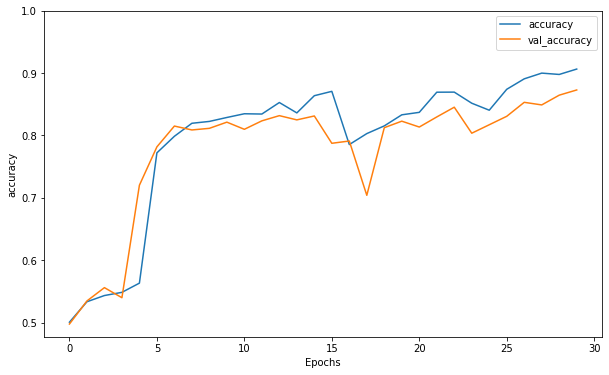

In [ ]:
# plot training and validation accuracy at the end of each epoch

# define a plot helper function
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric], '')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])

# plot the epoches accuracy 
plt.figure(figsize=(10, 6))
plot_graphs(history, 'accuracy')
plt.ylim(None,1)

In [ ]:
# Evaluate accuracy on the test set.

test_loss, test_acc = rnn_model.evaluate(val_ds_rnn)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

40/40 [==============================] - 1s 26ms/step - loss: 0.5689 - accuracy: 0.8656
Test Loss: 0.5689043402671814
Test Accuracy: 0.8655999898910522


In [ ]:
# Show an example from the test set for each class where the model misclassifies

# use trained RNN model to predict on one batch
sample_val_ds_rnn = val_ds_rnn.take(1)
sample_pred = rnn_model.predict(sample_val_ds_rnn)

# record prediction results in a list
pred_record = []
for i in range(len(sample_pred)):
    if sample_pred[i] < 0.5:
        pred_record.append(0)
    elif sample_pred[i] > 0.5:
        pred_record.append(1)
    else:
        raise Exception("Neutral prediction happened!")

In [ ]:
# get the corresponding tests with True labels

sample_valid_text_list = []
valid_true_label_list = []
for text, label in sample_val_ds_rnn:
    sample_valid_text_list.append(text.numpy())
    valid_true_label_list.append(label.numpy())

# flatten the lists
sample_valid_texts = np.array(sample_valid_text_list).flatten(order='C')
valid_true_labels = np.array(valid_true_label_list).flatten(order='C')

In [ ]:
# extract an example of False Positive text-label pair

pos_misc_label_idx = np.where(valid_true_labels==1)[0][0]
pos_misc_pred_label_idx = np.where(np.array(pred_record)==0)[0][0]

pos_misc_text = sample_valid_texts[pos_misc_label_idx]
pos_true_label = valid_true_labels[pos_misc_label_idx]
pos_fake_label = pred_record[pos_misc_pred_label_idx]

print(f"The extracted False Negative text = {pos_misc_text}")
print(f"True label of the text = {pos_true_label}")
print(f"Pred label of the text = {pos_fake_label}")

The extracted False Negative text = b"The industry dropped the ball on this. The trailer does not do the movie justice and when this opened it was on a hand full of screens. Had people had an opportunity to see this, work of mouth would have made it very successful. The 2 lead actresses each give great emotional performances that really draw you in to the story and especially the characters. I checked this out based on the rave recommendation Richard Roeper or (Ebert and Roeper) in his book. An example of a great film that never got fully released except on a few screens. Which gave it no chance to be seen. Some movies go to video quickly because they aren't that good. This is Oscar worthy and it's a tragedy on many levels that most will never even hear of it. Maybe via word of mouth it will gain a following on DVD or cable. If you haven't see this movie you should. Great performances of the 2 lead actresses make this movie. It could have just been another formulaic teen movie after sc

In [ ]:
# extract an example of False Negative text-label pair

neg_misc_label_idx = np.where(valid_true_labels==0)[0][0]
neg_misc_pred_label_idx = np.where(np.array(pred_record)==1)[0][0]

neg_misc_text = sample_valid_texts[neg_misc_label_idx]
neg_true_label = valid_true_labels[neg_misc_label_idx]
neg_fake_label = pred_record[neg_misc_pred_label_idx]

print(f"The extracted False Negative text = {neg_misc_text}")
print(f"True label of the text = {neg_true_label}")
print(f"Pred label of the text = {neg_fake_label}")

The extracted False Negative text = b'Oh dear, Oh dear. I started watching this not knowing what to expect. I couldn\'t believe what I was seeing. There were times when I thought it was a comedy. I loved how the government\'s plan to capture the terrorist leader is to air drop in one man, who is unarmed, and expect him to capture him and escape with a rocket pack. If only it were really that easy. I\'ve finally found a movie worse than "Plan 9 From Outer Space".'
True label of the text = 0
Pred label of the text = 1


**Answers of questions for RNN training 2.1.4**:

1. Number of trainable parameters in the RNN baseline model = 661,001, as shown in model summary above.

2. Plot of training and validation accuracy at the end of each epoch was shown as above code block.

3. Accuracy on the test set = 0.8656, as shown above.

4. Example from the test set for each class (positive/negative) where the model misclassifies was shown as upper two code blocks above.

5. Comment on any other observations about the model performance:
    - The RNN model is highly stochastic in nature thus with a more zigzag-like behavior for training and validation accuracy curves.
    - Above was the RNN baseline model which only using one LSTM layer. If stacking two or more LSTM layers, I would expect the model to achieve higher accuracy.

- - - - - -  - - - - - - --  -- - - - -- - - -

## Part II Applied Problems -- 2.2 Image

- References:
  - https://blog.keras.io/building-autoencoders-in-keras.html
  - https://blog.tensorflow.org/2018/04/fashion-mnist-with-tfkeras.html

### 2.2.0 Loading Fashion MNIST Dataset

In [ ]:
# load Fashion MNIST dataset with training set and test set
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
print("x_train data shape:", x_train.shape)
print("y_train label shape:", y_train.shape)

4423680/4422102 [==============================] - 0s 0us/step
x_train data shape: (60000, 28, 28)
y_train label shape: (60000,)


This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images.

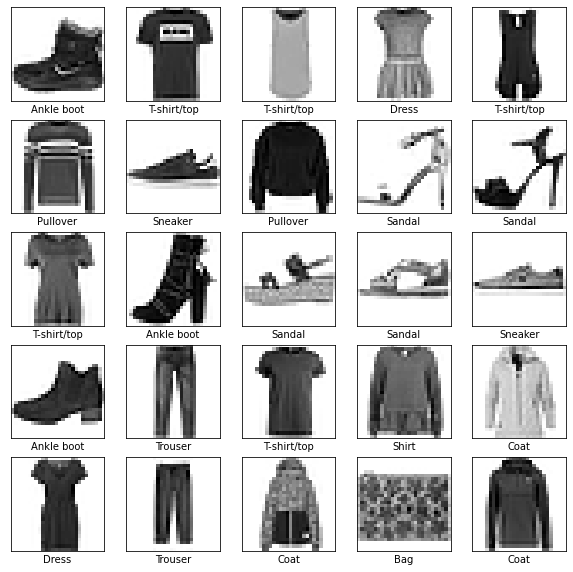

In [ ]:
# visualize the first 25 images from the training set
plt.rcParams['image.cmap'] = 'Greys'
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
    
plt.show()

In [ ]:
# pre-processing
# Normalize the data 
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
print(f"Original x training data size = {x_train.shape}.")
print(f"Original x test data size = {x_test.shape}.")

# reshape with suitable input format
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(f"Normalized and reshaped x training data size = {x_train.shape}.")
print(f"Normalized and reshaped x test data size = {x_test.shape}.")

Original x training data size = (60000, 28, 28).
Original x test data size = (10000, 28, 28).
Normalized and reshaped x training data size = (60000, 784).
Normalized and reshaped x test data size = (10000, 784).


### 2.2.1 Autoencoder

- Train a fully-connected autoencoder with ReLU activation and layer sizes (784, 300, 100,3 00, 784) for 10 epochs. 
- Use mean squared error (MSE) loss.

In [ ]:
# Build of a fully-connected autoencoder model

def autoencoder_model(input_shape):
    """ Build of a fully-connected autoencoder with ReLU activation 
    and layer sizes (784, 300, 100, 300, 784); Use mean squared error (MSE) loss. 
    """
    model = keras.Sequential()
    model.add(layers.InputLayer(input_shape=input_shape))
    
    # set encoders
    model.add(layers.Dense(300, activation='relu'))
    encoded = layers.Dense(100, activation='relu')
    model.add(encoded)
    
    # set decoders
    model.add(layers.Dense(300, activation='relu'))
    decoded = layers.Dense(784, activation='sigmoid')
    model.add(decoded)
    
    # compile the model
    model.compile(optimizer='adam', 
                  loss='mean_squared_error', 
                  metrics=['accuracy'])
    
    return model

In [ ]:
# model info
autoencoder = autoencoder_model(input_shape=(784,))
autoencoder.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_3 (Dense)              (None, 300)               30300     
_________________________________________________________________
dense_4 (Dense)              (None, 784)               235984    
Total params: 531,884
Trainable params: 531,884
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# train the auto encoder with 10 epochs without labels

autoencoder.fit(x_train, 
                x_train,
                batch_size=256,
                epochs=10,
                shuffle=True)

Epoch 1/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0383 - accuracy: 0.0104
Epoch 2/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0173 - accuracy: 0.0159
Epoch 3/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0147 - accuracy: 0.0214
Epoch 4/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0123 - accuracy: 0.0259
Epoch 5/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0113 - accuracy: 0.0279
Epoch 6/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0107 - accuracy: 0.0309
Epoch 7/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0099 - accuracy: 0.0324
Epoch 8/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0095 - accuracy: 0.0358
Epoch 9/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0091 - accuracy: 0.0373
Epoch 10/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0088 - accuracy: 0.0392

In [ ]:
# Make predictions

decoded_mnist = autoencoder.predict(x_train)

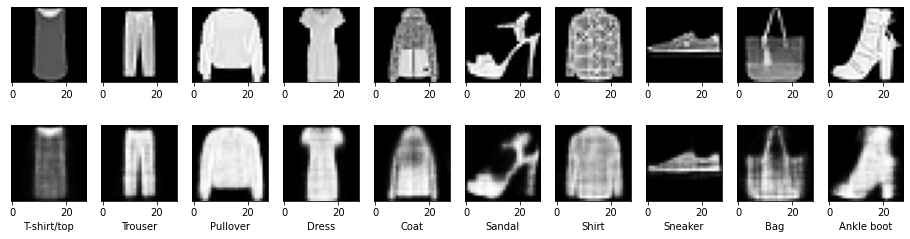

In [ ]:
# visualize the reconstructed inputs and the decoded images representations
plt.figure(figsize=(16, 4))

for i_class in range(len(class_names)):
    # Display original
    ax = plt.subplot(2, len(class_names), i_class + 1)
    i = np.argwhere(y_train == i_class)[1, 0]
    plt.imshow(x_train[i].reshape(28, 28))
    plt.gray()
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, len(class_names), i_class + 1 + len(class_names))
    plt.imshow(decoded_mnist[i].reshape(28, 28))
    plt.gray()
    plt.xlabel(class_names[i_class])
    ax.get_yaxis().set_visible(False)

plt.show()

In [ ]:
# training the encoder with half of the autoencoder architecture
encoder = keras.Sequential()
encoder.add(layers.InputLayer(input_shape=(784,)))
encoder.add(layers.Dense(300, activation='relu'))
encoded = layers.Dense(100, activation='relu')
encoder.add(encoded)

encoded_mnist = encoder.predict(x_train)

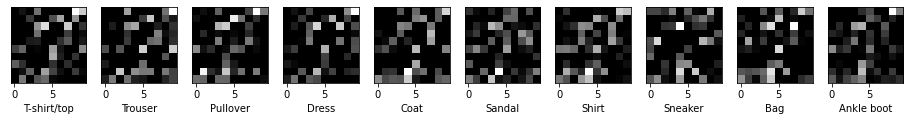

In [ ]:
# plot the encodings for ten examples of input, each class as 10x10 heatmaps

plt.figure(figsize=(16, 4))

for i_class in range(len(class_names)):
    i = np.argwhere(y_train == i_class)[1, 0]
    ax = plt.subplot(1, len(class_names), i_class + 1)
    plt.imshow(encoded_mnist[i].reshape((10, 10)))
    plt.gray()
    plt.xlabel(class_names[i_class])
    ax.get_yaxis().set_visible(False)

plt.show()

**Summary 2.2.1**: 
- From the reconstructed heatmaps for each class of Fashion MNIST dataset, We are losing quite a bit of detail with this basic encoder approach.

### 2.2.2 Dropout

- Retrain the autoencoder with dropout applied to incoming weights to all layers except the input and output layers.

In [ ]:
# define the autoencoder with dropout layers model

def autoencoder_dropout_model(input_shape):
    """ Build of a fully-connected autoencoder with ReLU activation 
    and layer sizes (784, 300, 100, 300, 784); Use mean squared error (MSE) 
    loss, with dropout applied to incoming weights to all layers 
    except the input and output layers
    """
    model = keras.Sequential()
    model.add(layers.InputLayer(input_shape=input_shape))
    
    # set encoders with dropout
    model.add(layers.Dense(300, activation='relu'))
    model.add(layers.Dropout(0.25))  # first dropout layer
    encoded = layers.Dense(100, activation='relu')
    model.add(encoded)
    model.add(layers.Dropout(0.25))  # second dropout layer
    
    # set decoders
    model.add(layers.Dense(300, activation='relu'))
    model.add(layers.Dropout(0.50))  # third dropout layer
    decoded = layers.Dense(784, activation='sigmoid')
    model.add(decoded)
    
    # compile the model
    model.compile(optimizer='adam', 
                  loss='mean_squared_error', 
                  metrics=['accuracy'])
    
    return model

In [ ]:
# model info

autoencoder_dropout = autoencoder_dropout_model(input_shape=(784,))
autoencoder_dropout.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 300)               235500    
_________________________________________________________________
dropout (Dropout)            (None, 300)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               30100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 300)               30300     
_________________________________________________________________
dropout_2 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 784)              

In [ ]:
# train the with-dropout auto encoder with 10 epochs without labels

autoencoder_dropout.fit(x_train, 
                x_train,
                batch_size=256,
                epochs=10,
                shuffle=True)

Epoch 1/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0503 - accuracy: 0.0082
Epoch 2/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0292 - accuracy: 0.0140
Epoch 3/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0262 - accuracy: 0.0140
Epoch 4/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0247 - accuracy: 0.0163
Epoch 5/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0237 - accuracy: 0.0169
Epoch 6/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0231 - accuracy: 0.0181
Epoch 7/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0225 - accuracy: 0.0180
Epoch 8/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0222 - accuracy: 0.0188
Epoch 9/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0219 - accuracy: 0.0194
Epoch 10/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0216 - accuracy: 0.0198

In [ ]:
# Make predictions

decoded_mnist = autoencoder_dropout.predict(x_train)

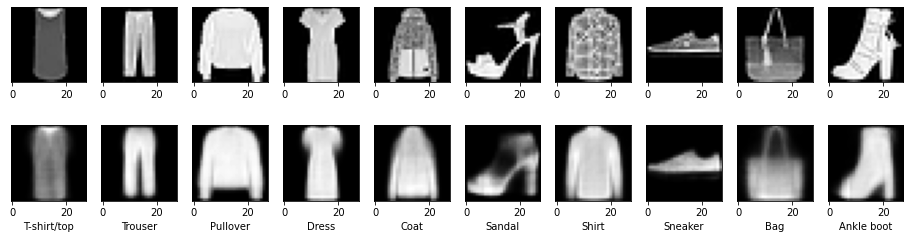

In [ ]:
# visualize the reconstructed inputs and the decoded images representations
plt.figure(figsize=(16, 4))

for i_class in range(len(class_names)):
    # Display original
    ax = plt.subplot(2, len(class_names), i_class + 1)
    i = np.argwhere(y_train == i_class)[1, 0]
    plt.imshow(x_train[i].reshape(28, 28))
    plt.gray()
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, len(class_names), i_class + 1 + len(class_names))
    plt.imshow(decoded_mnist[i].reshape(28, 28))
    plt.gray()
    plt.xlabel(class_names[i_class])
    ax.get_yaxis().set_visible(False)

plt.show()

In [ ]:
# training the encoder with half of the autoencoder architecture
encoder = keras.Sequential()
encoder.add(layers.InputLayer(input_shape=(784,)))
encoder.add(layers.Dense(300, activation='relu'))
encoder.add(layers.Dropout(0.25))
encoded = layers.Dense(100, activation='relu')
encoder.add(encoded)

encoded_mnist = encoder.predict(x_train)

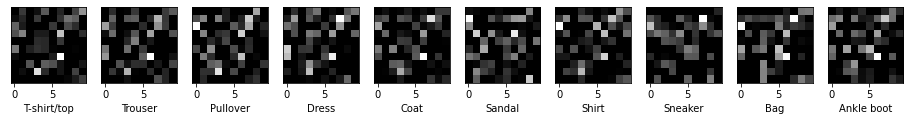

In [ ]:
# plot the encodings for ten examples of input, each class as 10x10 heatmaps, 
# display the same plots as section 2.2.1

plt.figure(figsize=(16, 4))

for i_class in range(len(class_names)):
    i = np.argwhere(y_train == i_class)[1, 0]
    ax = plt.subplot(1, len(class_names), i_class + 1)
    plt.imshow(encoded_mnist[i].reshape((10, 10)))
    plt.gray()
    plt.xlabel(class_names[i_class])
    ax.get_yaxis().set_visible(False)

plt.show()

**Summary of 2.2.2**: 
  
From the reconstructed heatmaps for each class of Fashion MNIST dataset with dropout layers applied to incoming weights to all layers
except the input and output layers:
- I set dropout rate of 0.25, 0.25, and 0.5 for the three dropout layers.
- From the training epochs logs above, comparing with the autoencoder without any dropout layers, a greater MSE but higher training accuracy was achieved. 
- I conclude that the dropout layers worked as regularizer on neural nets that reduces the odds of overfitting by dropping out neurons at random, during every epoch.

### 2.2.3 CNN (baseline) 
Train a convolutional neural network on the training data with the
following layer specifications:
- 2D convolutional layer, 28 filters, 3x3 window size, ReLU activation
- 2x2 max pooling
- 2D convolutional layer, 56 filters, 3x3 window size, ReLU activation
- fully-connected layer, 56 nodes, ReLU activation
- fully-connected layer, 10 nodes, softmax activation

Use the Adam optimizer, 32 observations per batch, and sparse categorical cross-entropy loss.

In [ ]:
# re-load Fashion MNIST data for new data pre-processing

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
print("x_train data shape:", x_train.shape)
print("y_train label shape:", y_train.shape)

x_train data shape: (60000, 28, 28)
y_train label shape: (60000,)


In [ ]:
# pre-processing
# Normalize the data 
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
print(f"Original x training data size = {x_train.shape}.")
print(f"Original x test data size = {x_test.shape}.")

# reshape images with suitable input format
x_train = x_train.reshape(len(x_train), 28, 28, 1)
x_test = x_test.reshape(len(x_test), 28, 28, 1)
print(f"Normalized and reshaped x training data size = {x_train.shape}.")
print(f"Normalized and reshaped x test data size = {x_test.shape}.")

# use the last 12000 samples of the training data as a validation set
x_train = x_train[:-12000]
x_valid = x_train[-12000:]  # last 12000 samples
y_train = y_train[:-12000]
y_valid = y_train[-12000:]  # last 12000 samples
print(f"New training image set size = {x_train.shape}.")
print(f"New training label set size = {y_train.shape}.")
print(f"New validation image set size = {x_valid.shape}.")
print(f"New validation label set size = {y_valid.shape}.")
print(f"Left test image set size = {x_test.shape}.")
print(f"Left test label set size = {y_test.shape}.")

Original x training data size = (60000, 28, 28).
Original x test data size = (10000, 28, 28).
Normalized and reshaped x training data size = (60000, 28, 28, 1).
Normalized and reshaped x test data size = (10000, 28, 28, 1).
New training image set size = (48000, 28, 28, 1).
New training label set size = (48000,).
New validation image set size = (12000, 28, 28, 1).
New validation label set size = (12000,).
Left test image set size = (10000, 28, 28, 1).
Left test label set size = (10000,).


In [ ]:
# define the CNN baseline model

def cnn_baseline_model(input_shape):
    """ Build the CNN baseline model as provided layer details:
    - 2D convolutional layer, 28 filters, 3x3 window size, ReLU activation
    - 2x2 max pooling
    - 2D convolutional layer, 56 filters, 3x3 window size, ReLU activation
    - fully-connected layer, 56 nodes, ReLU activation
    - fully-connected layer, 10 nodes, softmax activation
    with the Adam optimizer, and sparse categorical cross-entropy loss.
    """
    model = keras.Sequential()
    
    # define the input shape in the first layer of the neural network
    model.add(layers.Conv2D(28, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2), padding='same'))
    model.add(layers.Conv2D(56, (3, 3), activation='relu', padding='same'))

    # transforms the format of the images from a two-dimensional array 
    # (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels)
    model.add(tf.keras.layers.Flatten())

    model.add(layers.Dense(56, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    
    # compile the model
    model.compile(optimizer='adam', 
                  loss=keras.losses.SparseCategoricalCrossentropy(), 
                  metrics=['accuracy'])
    
    return model

In [ ]:
# Print the number of trainable parameters in the model

cnn_baseline = cnn_baseline_model(input_shape=(28,28,1))
cnn_baseline.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 28)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 28)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 56)        14168     
_________________________________________________________________
flatten_1 (Flatten)          (None, 10976)             0         
_________________________________________________________________
dense_13 (Dense)             (None, 56)                614712    
_________________________________________________________________
dense_14 (Dense)             (None, 10)                570       
Total params: 629,730
Trainable params: 629,730
Non-trainable params: 0
________________________________________________

In [ ]:
# train the CNN baseline model with 32 observations per batch for 10 epochs

history = cnn_baseline.fit(x_train, 
                           y_train,
                           batch_size=32,
                           epochs=10,
                           shuffle=True,
                           validation_data=(x_valid, y_valid),
                           verbose=2)

Epoch 1/10
1500/1500 - 4s - loss: 0.4200 - accuracy: 0.8510 - val_loss: 0.3077 - val_accuracy: 0.8916
Epoch 2/10
1500/1500 - 4s - loss: 0.2739 - accuracy: 0.9008 - val_loss: 0.2304 - val_accuracy: 0.9168
Epoch 3/10
1500/1500 - 4s - loss: 0.2225 - accuracy: 0.9184 - val_loss: 0.1836 - val_accuracy: 0.9352
Epoch 4/10
1500/1500 - 5s - loss: 0.1867 - accuracy: 0.9315 - val_loss: 0.1445 - val_accuracy: 0.9485
Epoch 5/10
1500/1500 - 5s - loss: 0.1536 - accuracy: 0.9431 - val_loss: 0.1488 - val_accuracy: 0.9448
Epoch 6/10
1500/1500 - 4s - loss: 0.1271 - accuracy: 0.9528 - val_loss: 0.1084 - val_accuracy: 0.9607
Epoch 7/10
1500/1500 - 4s - loss: 0.1036 - accuracy: 0.9623 - val_loss: 0.0671 - val_accuracy: 0.9775
Epoch 8/10
1500/1500 - 4s - loss: 0.0835 - accuracy: 0.9690 - val_loss: 0.0639 - val_accuracy: 0.9770
Epoch 9/10
1500/1500 - 4s - loss: 0.0696 - accuracy: 0.9741 - val_loss: 0.0457 - val_accuracy: 0.9838
Epoch 10/10
1500/1500 - 4s - loss: 0.0548 - accuracy: 0.9793 - val_loss: 0.0407 - 

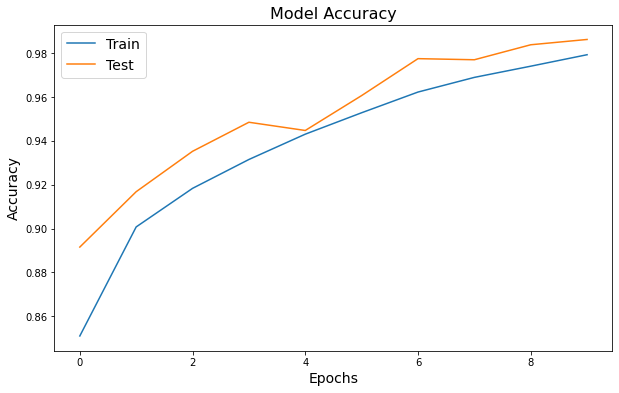

In [ ]:
# plot training and validation accuracy as line plots on the same set of axes

plt.figure(figsize=(10, 6))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy", fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(['Train', 'Test'], fontsize=14)
plt.show()

In [ ]:
# Evaluating the CNN baseline model

score = cnn_baseline.evaluate(x_test, y_test)
print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.3614 - accuracy: 0.9117
Loss: 0.3614
Accuracy: 0.9117


In [ ]:
# Show an example from the test set for each class where the model misclassifies

# define the label dict
cloth_dict = {0 : 'T-shirt/top',
            1 : 'Trouser',
            2 : 'Pullover',
            3 : 'Dress',
            4 : 'Coat',
            5 : 'Sandal',
            6 : 'Shirt',
            7 : 'Sneaker',
            8 : 'Bag',
            9 : 'Ankle boot'}

# change y_test to categorical data
y_test_cat = to_categorical(y_test, num_classes=10)

# Predict the values from the validation dataset
y_pred = cnn_baseline.predict(x_test)

# Convert predictions classes and validation observations to one hot vectors
y_pred_classes = np.argmax(y_pred, axis=1) 
y_true = np.argmax(y_test_cat, axis=1)

In [ ]:
incorrect_labels = []  # record index of incorrect labels
temp_y_true = []  # record unique class of true labels

for i in range(10000):
    if not (y_pred_classes[i] == y_true[i]):
        if y_true[i] in temp_y_true:
            pass
        else:
            incorrect_labels.append(i)
            temp_y_true.append(y_true[i])
    if (len(set(temp_y_true)) == 10):
        break

print(f"The collected unique misclassified one-hot labels = {incorrect_labels}.")

The collected unique misclassified one-hot labels = [23, 27, 42, 48, 89, 150, 529, 701, 722, 1822].


Text(0.5, 1.0, 'Predicted Label: Sandal\nActual Label: Sneaker')

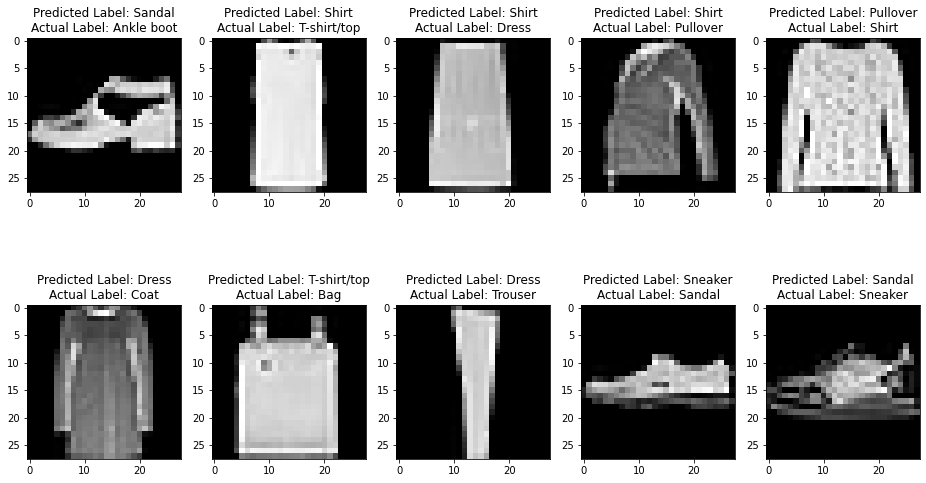

In [ ]:
# make the misclassification matrix

fig, ax = plt.subplots(2, 5, figsize=(12, 6))
fig.set_size_inches(16, 9)

ax[0,0].imshow(x_test[incorrect_labels[0]].reshape(28,28), cmap='gray')
ax[0,0].set_title("Predicted Label: " + str(cloth_dict[y_pred_classes[incorrect_labels[0]]]) + "\n"+"Actual Label: " + 
                 str(cloth_dict[y_true[incorrect_labels[0]]]))

ax[0,1].imshow(x_test[incorrect_labels[1]].reshape(28,28), cmap='gray')
ax[0,1].set_title("Predicted Label: " + str(cloth_dict[y_pred_classes[incorrect_labels[1]]]) + "\n"+"Actual Label: " + 
                 str(cloth_dict[y_true[incorrect_labels[1]]]))

ax[0,2].imshow(x_test[incorrect_labels[2]].reshape(28,28), cmap='gray')
ax[0,2].set_title("Predicted Label: " + str(cloth_dict[y_pred_classes[incorrect_labels[2]]]) + "\n"+"Actual Label: " + 
                 str(cloth_dict[y_true[incorrect_labels[2]]]))

ax[0,3].imshow(x_test[incorrect_labels[3]].reshape(28,28), cmap='gray')
ax[0,3].set_title("Predicted Label: " + str(cloth_dict[y_pred_classes[incorrect_labels[3]]]) + "\n"+"Actual Label: " + 
                 str(cloth_dict[y_true[incorrect_labels[3]]]))

ax[0,4].imshow(x_test[incorrect_labels[4]].reshape(28,28), cmap='gray')
ax[0,4].set_title("Predicted Label: " + str(cloth_dict[y_pred_classes[incorrect_labels[4]]]) + "\n"+"Actual Label: " + 
                 str(cloth_dict[y_true[incorrect_labels[4]]]))

ax[1,0].imshow(x_test[incorrect_labels[5]].reshape(28,28), cmap='gray')
ax[1,0].set_title("Predicted Label: " + str(cloth_dict[y_pred_classes[incorrect_labels[5]]]) + "\n"+"Actual Label: " + 
                 str(cloth_dict[y_true[incorrect_labels[5]]]))

ax[1,1].imshow(x_test[incorrect_labels[6]].reshape(28,28), cmap='gray')
ax[1,1].set_title("Predicted Label: " + str(cloth_dict[y_pred_classes[incorrect_labels[6]]]) + "\n"+"Actual Label: " + 
                 str(cloth_dict[y_true[incorrect_labels[6]]]))

ax[1,2].imshow(x_test[incorrect_labels[7]].reshape(28,28), cmap='gray')
ax[1,2].set_title("Predicted Label: " + str(cloth_dict[y_pred_classes[incorrect_labels[7]]]) + "\n"+"Actual Label: " + 
                 str(cloth_dict[y_true[incorrect_labels[7]]]))

ax[1,3].imshow(x_test[incorrect_labels[8]].reshape(28,28), cmap='gray')
ax[1,3].set_title("Predicted Label: " + str(cloth_dict[y_pred_classes[incorrect_labels[8]]]) + "\n"+"Actual Label: " + 
                 str(cloth_dict[y_true[incorrect_labels[8]]]))

ax[1,4].imshow(x_test[incorrect_labels[9]].reshape(28,28), cmap='gray')
ax[1,4].set_title("Predicted Label: " + str(cloth_dict[y_pred_classes[incorrect_labels[9]]]) + "\n"+"Actual Label: " + 
                 str(cloth_dict[y_true[incorrect_labels[9]]]))

In [ ]:
# Classification Report

print(classification_report(y_true, y_pred_classes, target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.89      0.82      0.85      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.83      0.91      0.87      1000
       Dress       0.92      0.90      0.91      1000
        Coat       0.87      0.87      0.87      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.75      0.76      0.75      1000
     Sneaker       0.93      0.98      0.95      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.99      0.93      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



**Answer to the questions for 2.2.3**:
1. Number of trainable parameters in the CNN baseline model = 629,730, as shown in model summary above.

2. Plot of training and validation accuracy at the end of each epoch was shown as above code block.

3. Accuracy on the test set = 0.9117, as shown above.

4. Figure matrix of an example from the test set for each class where the model misclassifies was shown as above.

5. Based on the classification report shown above:
  - Trouser and Ankle boot shared the best precision.
  - Trouser, Sandal, Sneaker, and Bag all showed best recall.
  - Trouser also showed the best F1 score.
  - Shirt showed worst classification statistics.

### 2.2.4 CNN (improvements)

- Modify the baseline CNN model to obtain at least 91% accuracy
on the test set. 
- Note the above CNN baseline model already achieved 91% + accuracy. 

In [ ]:
# define the CNN improved model

def cnn_improved_model(input_shape):
    """ Build the CNN baseline model as provided layer details:
    - 2D convolutional layer, 28 filters, 3x3 window size, ReLU activation
    - 2x2 max pooling
    - 2D convolutional layer, 56 filters, 3x3 window size, ReLU activation
    - fully-connected layer, 56 nodes, ReLU activation
    - fully-connected layer, 10 nodes, softmax activation
    with the Adam optimizer, and sparse categorical cross-entropy loss.
    """
    model = keras.Sequential()
    
    # define the input shape in the first layer of the neural network
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2), padding='same'))
    model.add(layers.Dropout(0.25))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.Dropout(0.4))

    # transforms the format of the images from a two-dimensional array 
    # (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels)
    model.add(tf.keras.layers.Flatten())

    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(10, activation='softmax'))
    
    # compile the model
    model.compile(optimizer='adam', 
                  loss=keras.losses.SparseCategoricalCrossentropy(), 
                  metrics=['accuracy'])
    
    return model

In [ ]:
# Improved CNN model summary

cnn_improved = cnn_improved_model(input_shape=(28,28,1))
cnn_improved.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
dropout_5 (Dropout)          (None, 12, 12, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 18432)            

In [ ]:
# train the CNN improved model with 32 observations per batch for 10 epochs

history = cnn_improved.fit(x_train, 
                           y_train,
                           batch_size=64,
                           epochs=10,
                           shuffle=True,
                           validation_data=(x_valid, y_valid),
                           verbose=2)

Epoch 1/10
750/750 - 4s - loss: 0.4791 - accuracy: 0.8270 - val_loss: 0.2961 - val_accuracy: 0.8909
Epoch 2/10
750/750 - 4s - loss: 0.3092 - accuracy: 0.8878 - val_loss: 0.2246 - val_accuracy: 0.9193
Epoch 3/10
750/750 - 4s - loss: 0.2624 - accuracy: 0.9041 - val_loss: 0.1898 - val_accuracy: 0.9300
Epoch 4/10
750/750 - 4s - loss: 0.2341 - accuracy: 0.9132 - val_loss: 0.1722 - val_accuracy: 0.9359
Epoch 5/10
750/750 - 4s - loss: 0.2146 - accuracy: 0.9194 - val_loss: 0.1476 - val_accuracy: 0.9471
Epoch 6/10
750/750 - 4s - loss: 0.1961 - accuracy: 0.9271 - val_loss: 0.1313 - val_accuracy: 0.9516
Epoch 7/10
750/750 - 4s - loss: 0.1797 - accuracy: 0.9328 - val_loss: 0.1151 - val_accuracy: 0.9588
Epoch 8/10
750/750 - 4s - loss: 0.1658 - accuracy: 0.9371 - val_loss: 0.1012 - val_accuracy: 0.9634
Epoch 9/10
750/750 - 4s - loss: 0.1540 - accuracy: 0.9429 - val_loss: 0.0899 - val_accuracy: 0.9694
Epoch 10/10
750/750 - 4s - loss: 0.1405 - accuracy: 0.9470 - val_loss: 0.0776 - val_accuracy: 0.9722

In [ ]:
# Evaluating the CNN improved model

score = cnn_improved.evaluate(x_test, y_test)
print('Improved CNN model Loss: {:.4f}'.format(score[0]))
print('Improved CNN model Accuracy: {:.4f}'.format(score[1]))

313/313 [==============================] - 1s 2ms/step - loss: 0.2379 - accuracy: 0.9237
Improved CNN model Loss: 0.2379
Improved CNN model Accuracy: 0.9237


**Improved CNN Model Summary 2.2.4**:
- Trainable params of the improved CNN increase to 2,453,386.

- The improved CNN model has test set accuracy = 0.9237.

- The detailed model architecture and hyperparameters were implemented inside of the function `cnn_improved_model`.

- The justifications were based on:
  - Adding Dropout layers before Conv2D layer, Flatten layer, and fully-connected layer.
  - Increase the number of filters in Conv2D layers and fully-connected layers.
  - Increase the batch size from 32 to 64.